## EE634 HW2 
### Kutay Ugurlu 2232841

In [38]:

import numpy as np 
from matplotlib import pyplot as plt 
from scipy.linalg import hadamard, eig
from skimage.color import rgb2gray
from scipy.fft import fft, ifft, fft2, ifft2
%matplotlib inline

# Q1

## a

In [39]:
def Hadamard_doubler(H):
    s1,_ = H.shape
    H_double_first_row = np.hstack((H,H))
    H_double_second_row = np.hstack((H,-1*H))
    return 1/np.sqrt(2) * np.vstack((H_double_first_row,H_double_second_row))

def HadamardMtx(N:int):
    H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
    for _ in range(1,N):
        H = Hadamard_doubler(H)
    return H
    

In [40]:
######### TEST ################
for N in range(8):
    assert not np.any(np.isclose(hadamard(2**N)-HadamardMtx(N),np.zeros((2**N,2**N)))) 
print("All tests passed!")

All tests passed!


## b

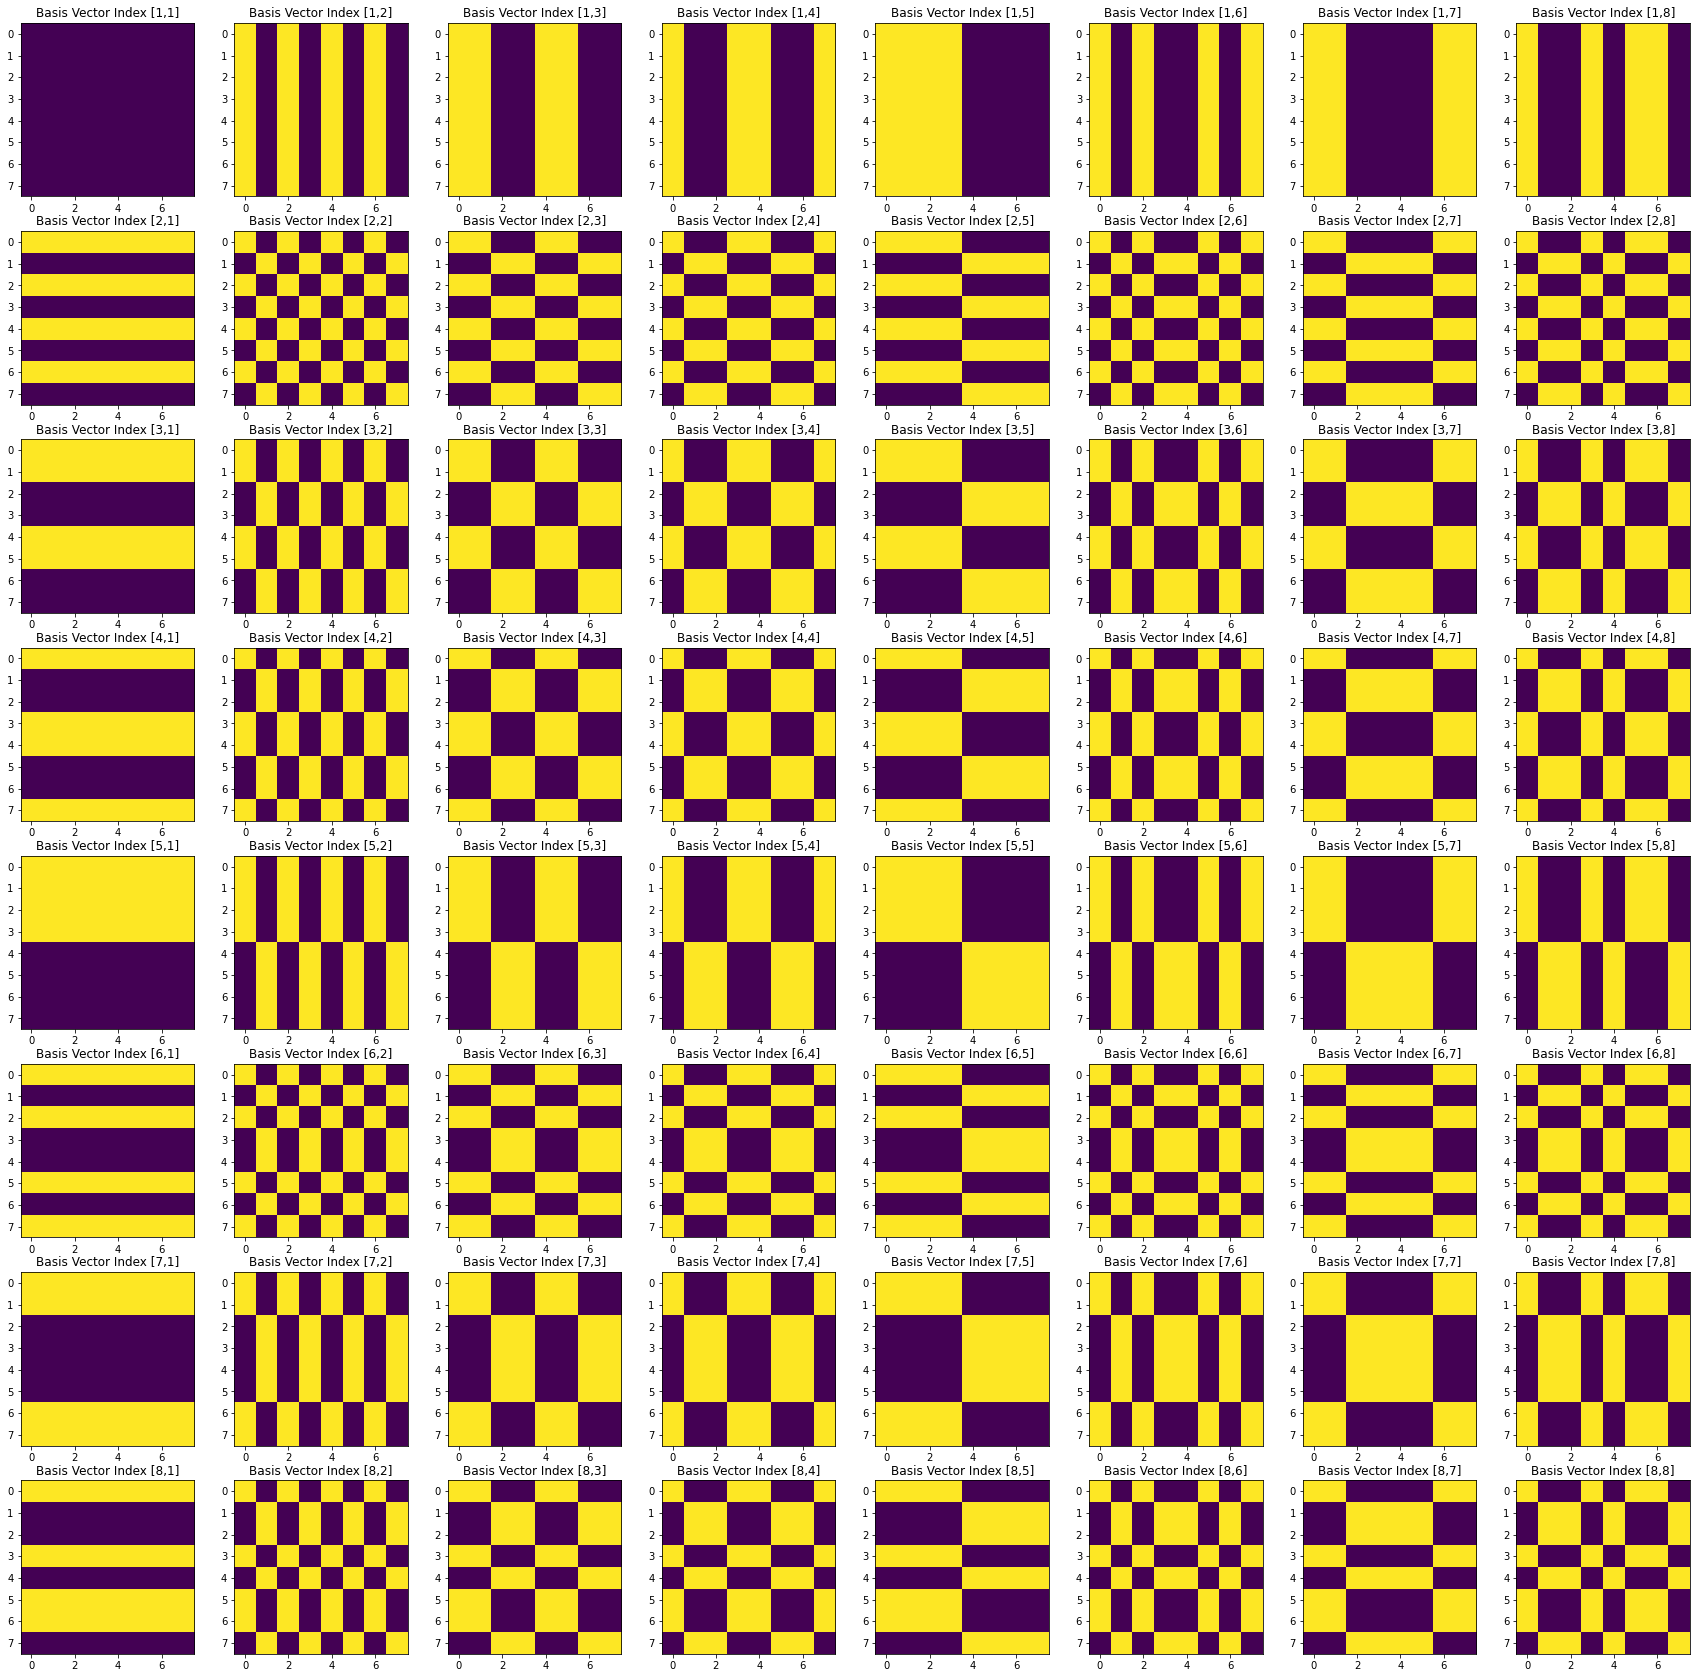

In [41]:
H = HadamardMtx(3)
plt.figure(figsize=(30,30))
for i in range(8):
    for j in range(8):
        basis_vec = np.zeros((8,8))
        basis_vec[i,j] = 1
        hadamard_basis_vec = H.dot(basis_vec).dot(H.T) # 2D transform with 1D transform matrices
        plt.subplot(8,8,8*(i)+(j+1))
        plt.imshow(hadamard_basis_vec)
        plt.title("Basis Vector Index ["+str(i+1)+","+str(j+1)+"]")


# Q2

## a

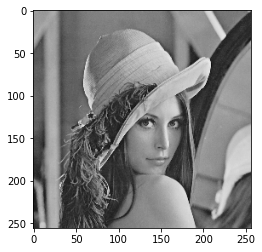

In [42]:
Lena = plt.imread("256by256grayscaleLena.png")
Lena = rgb2gray(Lena[...,1:4])
plt.imshow(Lena, cmap="gray")

## b

In [157]:
def dct(x):
    if len(x.shape) == 1:
        x = np.reshape(x,(1,x.shape[0])) 
    N = x.shape[1]
    y = np.hstack((x,np.flip(x)))
    Y = fft(y)
    k = np.arange(0,N)
    W = np.exp(-1j*(np.pi)/N*k/2)
    Y_truncated = Y[:,0:N]
    Cx = W*(Y_truncated)
    return np.real(Cx)

def zero_mean_cols(img):
    return img - np.mean(img,-1)

def cov(img):
    img = zero_mean_cols(img)
    return img.dot(img.T)

def KLT_mtx(img):
    C_img = cov(img)
    w_vl = eig(C_img, left=True)
    return w_vl[1]

Diagonal Coefficients Ratio:  0.014362433


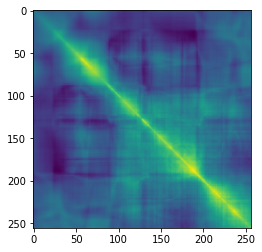

In [158]:
img = Lena
Cov_Lena = (img-np.mean(img)).dot((img-np.mean(img)).T)
Diagonal_Coef_Ratio = np.sum(np.diag(np.abs(Cov_Lena))) / np.sum(np.abs(Cov_Lena))
print("Diagonal Coefficients Ratio: ", Diagonal_Coef_Ratio)
plt.imshow((Cov_Lena))

Diagonal Coefficients Ratio:  0.003916604


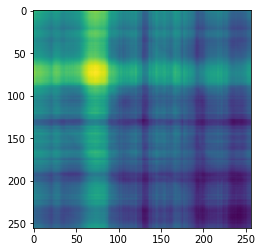

In [159]:
img = (fft(Lena))
Cov_Lena = np.abs((img-np.mean(img)).dot((img-np.mean(img)).T))
Diagonal_Coef_Ratio = np.sum(np.diag(Cov_Lena)) / np.sum(Cov_Lena)
print("Diagonal Coefficients Ratio: ", Diagonal_Coef_Ratio)
plt.imshow((np.abs(Cov_Lena)))

Diagonal Coefficients Ratio:  0.003989559692810431


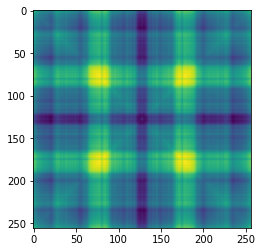

In [160]:
img = dct(Lena)
Cov_Lena = (img-np.mean(img)).dot((img-np.mean(img)).T)
Diagonal_Coef_Ratio = np.sum(np.diag(np.abs(Cov_Lena))) / np.sum(np.abs(Cov_Lena))
print("Diagonal Coefficients Ratio: ", Diagonal_Coef_Ratio)
plt.imshow(np.log10(Cov_Lena))

Diagonal Coefficients Ratio:  0.0069774035


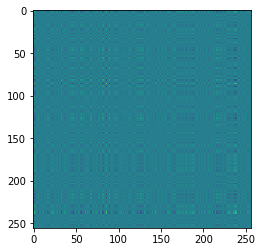

In [161]:
A = KLT_mtx(Lena)
img = A.dot(Lena)
Cov_Lena = (img-np.mean(img,-1)).dot((img-np.mean(img,-1)).T)
Diagonal_Coef_Ratio = np.sum(np.diag(np.abs(Cov_Lena))) / np.sum(np.abs(Cov_Lena))
print("Diagonal Coefficients Ratio: ", Diagonal_Coef_Ratio)
plt.imshow(1+Cov_Lena)